In [192]:
import pandas as pd
pd.set_option('display.max_columns', None)

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
#import patsy

In [84]:
##import the load data

load_df = pd.read_csv('TransportationLoads.csv', low_memory=False)

In [85]:
#get some stats from the dataframe
#nbr_of_rows = len(load_df.index)
#print(nbr_of_rows)
load_df.shape

(99999, 162)

In [86]:
##review the column headers and a few rows of the data
load_df.head()
##load_df.count()

,load_id,orign_loc_cd,orign_loc_id,orign_loc_type_cd,orign_loc_type_desc,orign_zone_cd,orign_zone_desc,orign_loc_nm,orign_st_addr_line_1,orign_city_nm,orign_st_prov_cd,orign_postal_cd,orign_cntry_cd,orign_lat_dgr,orign_long_dgr,dest_loc_cd,dest_loc_id,dest_loc_type_cd,dest_loc_type_desc,dest_zone_cd,dest_zone_desc,dest_loc_nm,dest_st_addr_line_1,dest_city_nm,dest_st_prov_cd,dest_postal_cd,dest_cntry_cd,dest_lat_dgr,dest_long_dgr,non_live_pckup_ind,non_live_dlvr_ind,svc_rate_cd,svc_rate_desc,trnsp_mode_cd,trnsp_mode_desc,equip_type_cd,equip_type_desc,spot_rate_ind,trlr_id,src_create_user_id,src_create_ts,src_last_chng_user_id,src_last_chng_ts,max_shpmnt_qty,load_stop_qty,load_plan_type_id,optimizer_batch_id,load_conf_user_id,scac_cd,op_cmpny_cd,op_load_status_id,op_load_status_cd,op_load_status_short_desc,op_load_status_desc,carrier_nm,carr_type_id,carr_type_cd,carr_type_desc,eff_rate_dt,lnhul_chrg_amt,fuel_surch_amt,addtnl_chrg_amt,tot_shpmnt_qty,tot_order_case_qty,tot_ord_pallet_qty,on_hld_shpmnt_qty,init_load_optim_ts,act_load_beg_ts,actl_load_orign_dep_ts,actl_load_final_dest_arvl_ts,act_load_cmpl_ts,est_met_ovrd_ind,est_tot_lad_len_qty,est_max_lad_len_qty,est_load_beg_ts,est_load_cmpl_ts,est_load_cmpl_hr_qty,est_tot_mi_qty,est_tot_dir_mi_qty,est_out_of_rte_mi_qty,est_load_mi_qty,est_unloaded_mi_qty,est_interload_mi_qty,est_repositioning_mi_qty,est_rtn_to_orign_mi_qty,est_tot_drvg_hr_qty,est_on_duty_hr_qty,est_off_duty_hr_qty,est_loadg_hr_qty,est_unloading_hr_qty,est_max_wait_hr_qty,est_wait_hr_qty,est_tot_wt_qty,est_max_wt_qty,est_tot_cube_qty,est_max_cube_qty,tot_optm_case_qty,est_max_case_qty,tot_optm_pallet_qty,est_max_pallet_qty,est_gross_carrier_chrg_amt,est_net_carrier_chrg_amt,load_cre_mthd_id,load_cre_mthd_cd,load_cre_mthd_desc,load_supended_status_id,load_supended_status_nm,load_supended_status_desc,load_sched_ovrd_ind,pland_prmry_stop_qty,carrier_trnsp_mode_id,carrier_trnsp_mode_cd,carrier_trnsp_mode_desc,rate_shop_rsn_id,rate_shop_rsn_cd,rate_shop_rsn_desc,vouch_cre_excpt_ind,last_vouch_cre_excpt_id,last_vouch_cre_excpt_cd,last_vouch_cre_excpt_desc,last_vouch_cre_excpt_ts,last_load_shpmnt_chng_ts,last_load_cost_calc_ts,last_load_sched_optimizer_ts,last_load_tndr_ts,team_drvr_ind,protn_lvl_cd,protn_lvl_desc,mdse_seg_nbr,mdse_seg_desc,commodity_id,commodity_desc,carr_pckup_due_dt,carr_dlvr_due_dt,cnsld_class_id,fin_load_status_id,fin_load_status_cd,fin_load_status_short_desc,fin_load_status_desc,shpmnt_plang_status_id,shpmnt_plang_status_cd,shpmnt_plang_status_desc,tndr_req_id,tendering_status_id,tendering_status_cd,tendering_status_desc,valid_rate_ind,frght_pymt_type_id,frght_pymt_type_cd,frght_pymt_type_desc,frght_bill_rspbl_party_cd,frght_bill_rspbl_party_nm,load_last_event_cd,load_last_event_desc,load_last_event_sys_gen_ind,manl_load_late_event_cd,manl_load_late_event_desc,src_rcv_ts,load_userid,load_ts,upd_ts,upd_userid
0,10001386,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,NaN,H. P. HOOD FOODS,NaN,WINCHESTER,VA,22602,US,NaN,NaN,6047-DC,6047,DC,DC for PS,47937301-VNDR,NaN,"BEDFORD, PA GROC DC",NaN,BEDFORD,PA,15522,US,NaN,NaN,0,0,TLSR,Truck Load Mode with Single Service and Reefer...,TL,Full Truck Load,53RRE,REF53 with Reefer protection,0,NaN,VENTURE,51:07.0,vn507a6,45:04.0,1,2,NaN,1122,vn507a6,WALM,WMT-US,345,LL COMPLETED,Completed,Load Operational Statuses COMPLETED,Wal-Mart Private Fleet,4,FLEET,FLEET,4/28/2019,360.00,36.69,NaN,1,0,0,0,00:00.0,NaN,02:00.0,05:00.0,4/28/2019 3:05,0,0.0,0.0,01:00.0,05:00.0,2.07,93,93,0,93,0,0,0,0,2.07,2.07,0.0,0.0,0.0,0.00,0.00,36042.0,36042.0,744.0,36042.0,1280,0,0,0,396.69,396.69,1,OPT,Optimization,1,NOT SUSPEND,Not Suspended,NaN,2,3091,WALM_TL,WALM_TL Tariff,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,20:08.0,NaN,06:47.0,0,Reefer,Refrigerated / Frozen,NaN,GROCERY,120.0,"120-Dairy, Cheese, Dough,Deli Salads, Eggs, Ch...",4/28/2019,4/28/2019,98923182,1215,LLHFVCHRPND,Voucher Pending,Load Financial Voucher Pending,4,LOCKED,Locked,2605.0,50,ATP_CANCELED,User Cancelation,1,1,COL

In [87]:
##list out the columns in the file
load_df.columns

Index(['load_id', 'orign_loc_cd', 'orign_loc_id', 'orign_loc_type_cd',
       'orign_loc_type_desc', 'orign_zone_cd', 'orign_zone_desc',
       'orign_loc_nm', 'orign_st_addr_line_1', 'orign_city_nm',
       ...
       'load_last_event_cd', 'load_last_event_desc',
       'load_last_event_sys_gen_ind', 'manl_load_late_event_cd',
       'manl_load_late_event_desc', 'src_rcv_ts', 'load_userid', 'load_ts',
       'upd_ts', 'upd_userid'],
      dtype='object', length=162)

In [88]:
#several columns are almost completely full of  nulls
#find and remove them

print('orign_zone_desc Nulls = ' + str(load_df.orign_st_addr_line_1.isnull().sum()))
print('orign_st_addr_line_1 Nulls = ' + str(load_df.orign_st_addr_line_1.isnull().sum()))
print('orign_lat_dgr Nulls = ' + str(load_df.orign_lat_dgr.isnull().sum()))
print('orign_long_dgr Nulls = ' + str(load_df.orign_long_dgr.isnull().sum()))
print('dest_zone_desc Nulls = ' + str(load_df.dest_zone_desc.isnull().sum()))
print('dest_st_addr_line_1 Nulls = ' + str(load_df.dest_st_addr_line_1.isnull().sum()))
print('dest_lat_dgr Nulls = ' + str(load_df.dest_lat_dgr.isnull().sum()))
print('dest_long_dgr Nulls = ' + str(load_df.dest_long_dgr.isnull().sum()))
print('trlr_id Nulls = ' + str(load_df.trlr_id.isnull().sum()))
print('load_plan_type_id Nulls = ' + str(load_df.load_plan_type_id.isnull().sum()))
print('addtnl_chrg_amt Nulls = ' + str(load_df.addtnl_chrg_amt.isnull().sum()))
print('load_sched_ovrd_ind Nulls = ' + str(load_df.load_sched_ovrd_ind.isnull().sum()))
print('rate_shop_rsn_cd Nulls = ' + str(load_df.rate_shop_rsn_cd.isnull().sum()))
print('rate_shop_rsn_desc Nulls = ' + str(load_df.rate_shop_rsn_desc.isnull().sum()))
print('last_vouch_cre_excpt_id Nulls = ' + str(load_df.last_vouch_cre_excpt_id.isnull().sum()))
print('last_vouch_cre_excpt_cd Nulls = ' + str(load_df.last_vouch_cre_excpt_cd.isnull().sum()))
print('last_vouch_cre_excpt_desc Nulls = ' + str(load_df.last_vouch_cre_excpt_desc.isnull().sum()))
print('last_vouch_cre_excpt_ts Nulls = ' + str(load_df.last_vouch_cre_excpt_ts.isnull().sum()))
print('last_load_shpmnt_chng_ts Nulls = ' + str(load_df.last_load_shpmnt_chng_ts.isnull().sum()))
print('last_load_sched_optimizer_ts Nulls = ' + str(load_df.last_load_sched_optimizer_ts.isnull().sum()))
print('mdse_seg_nbr Nulls = ' + str(load_df.mdse_seg_nbr.isnull().sum()))
print('manl_load_late_event_cd Nulls = ' + str(load_df.manl_load_late_event_cd.isnull().sum()))
print('manl_load_late_event_desc Nulls = ' + str(load_df.manl_load_late_event_desc.isnull().sum()))

orign_zone_desc Nulls = 99914
orign_st_addr_line_1 Nulls = 99914
orign_lat_dgr Nulls = 99914
orign_long_dgr Nulls = 99914
dest_zone_desc Nulls = 92025
dest_st_addr_line_1 Nulls = 99914
dest_lat_dgr Nulls = 99914
dest_long_dgr Nulls = 99914
trlr_id Nulls = 94668
load_plan_type_id Nulls = 99834
addtnl_chrg_amt Nulls = 48886
load_sched_ovrd_ind Nulls = 99999
rate_shop_rsn_cd Nulls = 99984
rate_shop_rsn_desc Nulls = 99984
last_vouch_cre_excpt_id Nulls = 94450
last_vouch_cre_excpt_cd Nulls = 94450
last_vouch_cre_excpt_desc Nulls = 94450
last_vouch_cre_excpt_ts Nulls = 94450
last_load_shpmnt_chng_ts Nulls = 99996
last_load_sched_optimizer_ts Nulls = 99981
mdse_seg_nbr Nulls = 99999
manl_load_late_event_cd Nulls = 96187
manl_load_late_event_desc Nulls = 96187


In [89]:
#lots of repeated code here, put this in a function if you can't find a way to delete more than one column at a time
del load_df['orign_zone_desc']
del load_df['orign_st_addr_line_1']
del load_df['orign_lat_dgr']
del load_df['orign_long_dgr']
del load_df['dest_zone_desc']
del load_df['dest_st_addr_line_1']
del load_df['dest_lat_dgr']
del load_df['dest_long_dgr']
del load_df['trlr_id']
del load_df['load_plan_type_id']
del load_df['addtnl_chrg_amt']
del load_df['load_sched_ovrd_ind']
del load_df['rate_shop_rsn_cd']
del load_df['rate_shop_rsn_desc']
del load_df['last_vouch_cre_excpt_id']
del load_df['last_vouch_cre_excpt_cd']
del load_df['last_vouch_cre_excpt_desc']
del load_df['last_vouch_cre_excpt_ts']
del load_df['last_load_shpmnt_chng_ts']
del load_df['last_load_sched_optimizer_ts']
del load_df['mdse_seg_nbr']
del load_df['manl_load_late_event_cd']
del load_df['manl_load_late_event_desc']

In [90]:
load_df

,load_id,orign_loc_cd,orign_loc_id,orign_loc_type_cd,orign_loc_type_desc,orign_zone_cd,orign_loc_nm,orign_city_nm,orign_st_prov_cd,orign_postal_cd,orign_cntry_cd,dest_loc_cd,dest_loc_id,dest_loc_type_cd,dest_loc_type_desc,dest_zone_cd,dest_loc_nm,dest_city_nm,dest_st_prov_cd,dest_postal_cd,dest_cntry_cd,non_live_pckup_ind,non_live_dlvr_ind,svc_rate_cd,svc_rate_desc,trnsp_mode_cd,trnsp_mode_desc,equip_type_cd,equip_type_desc,spot_rate_ind,src_create_user_id,src_create_ts,src_last_chng_user_id,src_last_chng_ts,max_shpmnt_qty,load_stop_qty,optimizer_batch_id,load_conf_user_id,scac_cd,op_cmpny_cd,op_load_status_id,op_load_status_cd,op_load_status_short_desc,op_load_status_desc,carrier_nm,carr_type_id,carr_type_cd,carr_type_desc,eff_rate_dt,lnhul_chrg_amt,fuel_surch_amt,tot_shpmnt_qty,tot_order_case_qty,tot_ord_pallet_qty,on_hld_shpmnt_qty,init_load_optim_ts,act_load_beg_ts,actl_load_orign_dep_ts,actl_load_final_dest_arvl_ts,act_load_cmpl_ts,est_met_ovrd_ind,est_tot_lad_len_qty,est_max_lad_len_qty,est_load_beg_ts,est_load_cmpl_ts,est_load_cmpl_hr_qty,est_tot_mi_qty,est_tot_dir_mi_qty,est_out_of_rte_mi_qty,est_load_mi_qty,est_unloaded_mi_qty,est_interload_mi_qty,est_repositioning_mi_qty,est_rtn_to_orign_mi_qty,est_tot_drvg_hr_qty,est_on_duty_hr_qty,est_off_duty_hr_qty,est_loadg_hr_qty,est_unloading_hr_qty,est_max_wait_hr_qty,est_wait_hr_qty,est_tot_wt_qty,est_max_wt_qty,est_tot_cube_qty,est_max_cube_qty,tot_optm_case_qty,est_max_case_qty,tot_optm_pallet_qty,est_max_pallet_qty,est_gross_carrier_chrg_amt,est_net_carrier_chrg_amt,load_cre_mthd_id,load_cre_mthd_cd,load_cre_mthd_desc,load_supended_status_id,load_supended_status_nm,load_supended_status_desc,pland_prmry_stop_qty,carrier_trnsp_mode_id,carrier_trnsp_mode_cd,carrier_trnsp_mode_desc,rate_shop_rsn_id,vouch_cre_excpt_ind,last_load_cost_calc_ts,last_load_tndr_ts,team_drvr_ind,protn_lvl_cd,protn_lvl_desc,mdse_seg_desc,commodity_id,commodity_desc,carr_pckup_due_dt,carr_dlvr_due_dt,cnsld_class_id,fin_load_status_id,fin_load_status_cd,fin_load_status_short_desc,fin_load_status_desc,shpmnt_plang_status_id,shpmnt_plang_status_cd,shpmnt_plang_status_desc,tndr_req_id,tendering_status_id,tendering_status_cd,tendering_status_desc,valid_rate_ind,frght_pymt_type_id,frght_pymt_type_cd,frght_pymt_type_desc,frght_bill_rspbl_party_cd,frght_bill_rspbl_party_nm,load_last_event_cd,load_last_event_desc,load_last_event_sys_gen_ind,src_rcv_ts,load_userid,load_ts,upd_ts,upd_userid
0,10001386,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,H. P. HOOD FOODS,WINCHESTER,VA,22602,US,6047-DC,6047,DC,DC for PS,47937301-VNDR,"BEDFORD, PA GROC DC",BEDFORD,PA,15522,US,0,0,TLSR,Truck Load Mode with Single Service and Reefer...,TL,Full Truck Load,53RRE,REF53 with Reefer protection,0,VENTURE,51:07.0,vn507a6,45:04.0,1,2,1122,vn507a6,WALM,WMT-US,345,LL COMPLETED,Completed,Load Operational Statuses COMPLETED,Wal-Mart Private Fleet,4,FLEET,FLEET,4/28/2019,360.00,36.69,1,0,0,0,00:00.0,NaN,02:00.0,05:00.0,4/28/2019 3:05,0,0.000,0.000,01:00.0,05:00.0,2.07,93,93,0,93,0,0,0,0,2.07,2.07,0.0,0.0,0.0,0.00,0.00,36042.0,36042.0,744.0,36042.0,1280,0,0,0,396.69,396.69,1,OPT,Optimization,1,NOT SUSPEND,Not Suspended,2,3091,WALM_TL,WALM_TL Tariff,0,0,20:08.0,06:47.0,0,Reefer,Refrigerated / Frozen,GROCERY,120.0,"120-Dairy, Cheese, Dough,Deli Salads, Eggs, Ch...",4/28/2019,4/28/2019,98923182,1215,LLHFVCHRPND,Voucher Pending,Load Financial Voucher Pending,4,LOCKED,Locked,2605.0,50,ATP_CANCELED,User Cancelation,1,1,COLLECT,Collect,WM,Walmart,D1,D1-Completed Unloading at Delivery Location-No...,0.0,49:42.0,svcscdl,12:05.0,55:07.0,svcscdl
1,10001617,47937301-VNDR,47937301,VNDR,Vendor for PS,47937301-VNDR,H. P. HOOD FOODS,WINCHESTER,VA,22602,US,6095-DC,6095,DC,DC for PS,47937301-VNDR,"OPELIKA, AL GROC DC",OPELIKA,AL,36801,US,0,0,TLSR,Truck Load Mode with Single Service and Reefer...,TL,Full Truck Load,53RRE,REF53 with Reefer protection,0,eerober,13:00.0,vn507a6,30:24.0,2,2,1163,vn507a6,STVV,WMT-US,345,LL COMPLETED,Completed,Load Ope

In [91]:
##check the datatypes
##load_df.dtypes['sc_load.act_load_cmpl_ts']
print(load_df.dtypes.carr_dlvr_due_dt)
print(load_df.dtypes.orign_loc_id)

print(load_df.dtypes.orign_loc_id)
print(load_df.dtypes.dest_loc_id)
print(load_df.dtypes.carrier_nm)
print(load_df.dtypes.equip_type_desc)
print(load_df.dtypes.est_tot_mi_qty)
print(load_df.dtypes.lnhul_chrg_amt)
print(load_df.dtypes.carr_pckup_due_dt)

##'sc_load.act_load_cmpl_ts'] > 'sc_load.carr_dlvr_due_dt']

object
int64
int64
int64
object
object
int64
float64
object


In [92]:
#origin locations are ints, but aren't meant for applying math to them
load_df.orign_loc_id = load_df.orign_loc_id.astype(str)
load_df.est_tot_mi_qty = load_df.est_tot_mi_qty.astype(int)

In [93]:
## take the time off of the load_complete timestamp as the actual load comlete ts doesn't contain the timestamp
load_df.act_load_cmpl_ts = pd.to_datetime(load_df['act_load_cmpl_ts']).dt.date
load_df.carr_pckup_due_dt = pd.to_datetime(load_df['carr_pckup_due_dt']).dt.date

In [94]:
## check to make sure the timestamps are taken off
load_df[['load_id', 'act_load_cmpl_ts', 'carr_dlvr_due_dt', 'carr_pckup_due_dt']]

,load_id,act_load_cmpl_ts,carr_dlvr_due_dt,carr_pckup_due_dt
0,10001386,2019-04-28,4/28/2019,2019-04-28
1,10001617,2019-05-01,4/29/2019,2019-04-29
2,10001644,2019-04-30,4/30/2019,2019-04-30
3,10001762,2019-05-02,4/30/2019,2019-04-30
4,10002440,2019-05-04,5/4/2019,2019-05-04
...,...,...,...,...
99994,11118791,NaT,9/24/2020,2020-09-24
99995,11118813,2020-10-09,9/24/2020,2020-09-24
99996,11118817,2020-10-09,9/24/2020,2020-09-24
99997,11118903,2020-09-25,9/24/2020,2020-09-24


In [95]:
##make sure these date columns are date type
load_df.carr_dlvr_due_dt= pd.to_datetime(load_df.carr_dlvr_due_dt)
load_df.act_load_cmpl_ts= pd.to_datetime(load_df.act_load_cmpl_ts)
load_df.carr_pckup_due_dt= pd.to_datetime(load_df.carr_pckup_due_dt)

In [96]:
print(load_df.dtypes['carr_dlvr_due_dt'])
print(load_df.dtypes['act_load_cmpl_ts'])
print(load_df.dtypes['carr_pckup_due_dt'])

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [97]:
##to print a column's values, just type in the column name
##load_id = load_df['sc_load.load_id']
##load_id

In [98]:
##compare the actual load complete date to the delivery due date to determine late loads.  
##a value of 1 represents a late load and 0 represents an on-time load
#added one to the due date as Walmart allows a small range for delivery
comparison_column = np.where(load_df['act_load_cmpl_ts'] > load_df['carr_dlvr_due_dt'] + pd.DateOffset(1), 1, 0)
load_df['Late_Load'] = comparison_column
load_df[['load_id','act_load_cmpl_ts', 'carr_dlvr_due_dt', 'Late_Load']]

,load_id,act_load_cmpl_ts,carr_dlvr_due_dt,Late_Load
0,10001386,2019-04-28,2019-04-28,0
1,10001617,2019-05-01,2019-04-29,1
2,10001644,2019-04-30,2019-04-30,0
3,10001762,2019-05-02,2019-04-30,1
4,10002440,2019-05-04,2019-05-04,0
...,...,...,...,...
99994,11118791,NaT,2020-09-24,0
99995,11118813,2020-10-09,2020-09-24,1
99996,11118817,2020-10-09,2020-09-24,1
99997,11118903,2020-09-25,2020-09-24,0


In [99]:
print(load_df.dtypes['carr_dlvr_due_dt'])
print(load_df.dtypes['act_load_cmpl_ts'])
print(load_df.dtypes['Late_Load'])
print(load_df.dtypes['orign_loc_id'])
print(load_df.dtypes['Late_Load'])

datetime64[ns]
datetime64[ns]
int32
object
int32


In [100]:
load_df['delivery_days_dif'] = (load_df['act_load_cmpl_ts'] - load_df['carr_dlvr_due_dt']).dt.days

In [101]:
load_df['delivery_days_dif']

0         0.0
1         2.0
2         0.0
3         2.0
4         0.0
         ... 
99994     NaN
99995    15.0
99996    15.0
99997     1.0
99998     4.0
Name: delivery_days_dif, Length: 99999, dtype: float64

In [102]:
##clean up the data
##remove any rows where either of the dates is blank
##look for duplicate rows (load_id)
##add a column for average days to deliver?
##add a column for average days past delivery?

Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [103]:
late_load = load_df[load_df.Late_Load == 1]
#late_load.head()
late_load.shape

(36641, 141)

Writing origin_hist.pdf
Writing origin_hist.png


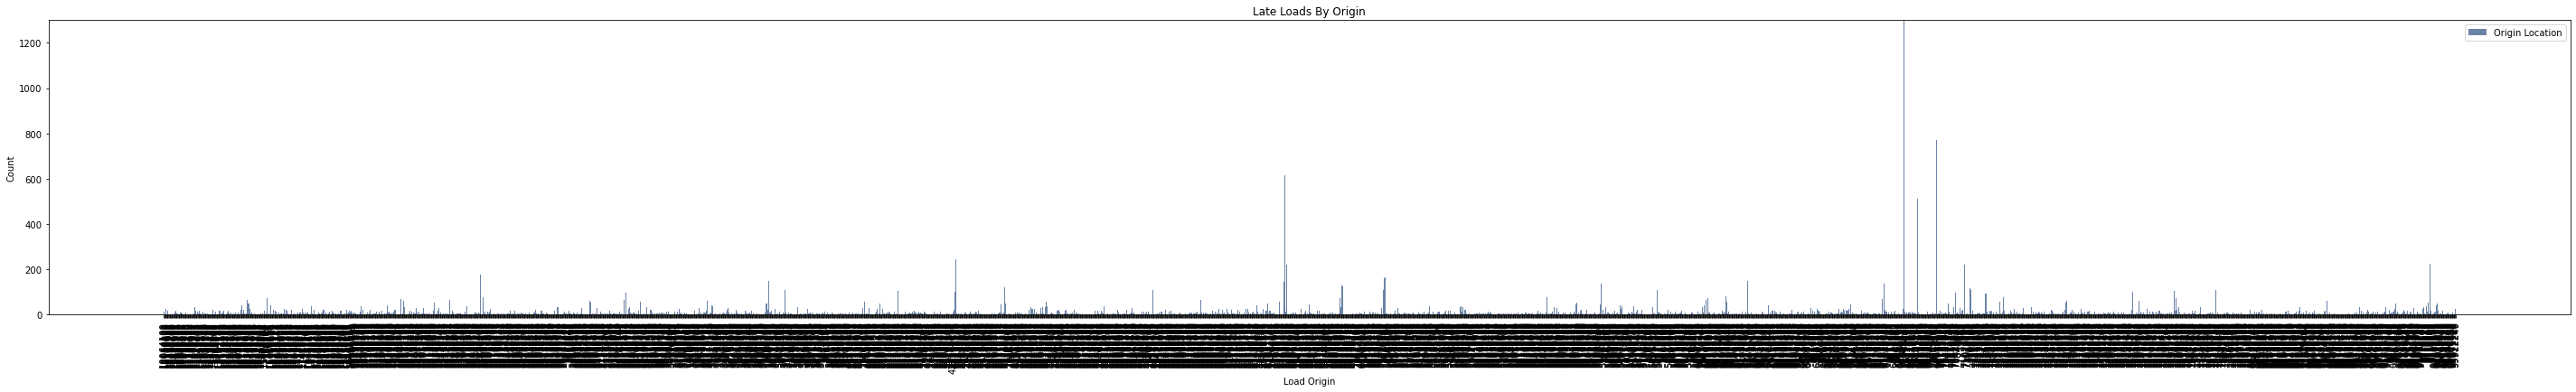

In [104]:
hist = thinkstats2.Hist(late_load['orign_loc_id'], label='Origin Location')
thinkplot.figure(figsize=(50,6))
plt.xticks(rotation=90)
thinkplot.Hist(hist)
thinkplot.Config(ylim=[0, 2000], title='Late Loads By Origin', xlabel='Load Origin', ylabel='Count')
thinkplot.save(root='origin_hist', bbox_inches = 'tight')

With such a large list of origin locations, I had a hard time displaying properly.  I should have grouped them by State or maybe zip-code, but I ran out of time.  
I think in these cases, the mode is a pretty important measurement for helping with the goals of this project.  Considering we're looking for significant correlations in the data that explain late loads.  Here, the histogram clearly shows the mode.

In [105]:
#look for any outliers
for late_load['orign_loc_id'], count in hist.Smallest(10):
        print(late_load['orign_loc_id'], count)

1        10064100
3        10064100
5        10064100
7        10064100
8        10064100
           ...   
99992    10064100
99993    10064100
99995    10064100
99996    10064100
99998    10064100
Name: orign_loc_id, Length: 36641, dtype: object 2
1        10064102
3        10064102
5        10064102
7        10064102
8        10064102
           ...   
99992    10064102
99993    10064102
99995    10064102
99996    10064102
99998    10064102
Name: orign_loc_id, Length: 36641, dtype: object 12
1        10064111
3        10064111
5        10064111
7        10064111
8        10064111
           ...   
99992    10064111
99993    10064111
99995    10064111
99996    10064111
99998    10064111
Name: orign_loc_id, Length: 36641, dtype: object 3
1        10068008
3        10068008
5        10068008
7        10068008
8        10068008
           ...   
99992    10068008
99993    10068008
99995    10068008
99996    10068008
99998    10068008
Name: orign_loc_id, Length: 36641, dtype: object 13
1 

<ipython-input-105-3420662b4815>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for late_load['orign_loc_id'], count in hist.Smallest(10):


For this dataset, I'm not sure I would classify these measures as outliers in the general sense.  

Writing dest_hist.pdf
Writing dest_hist.png


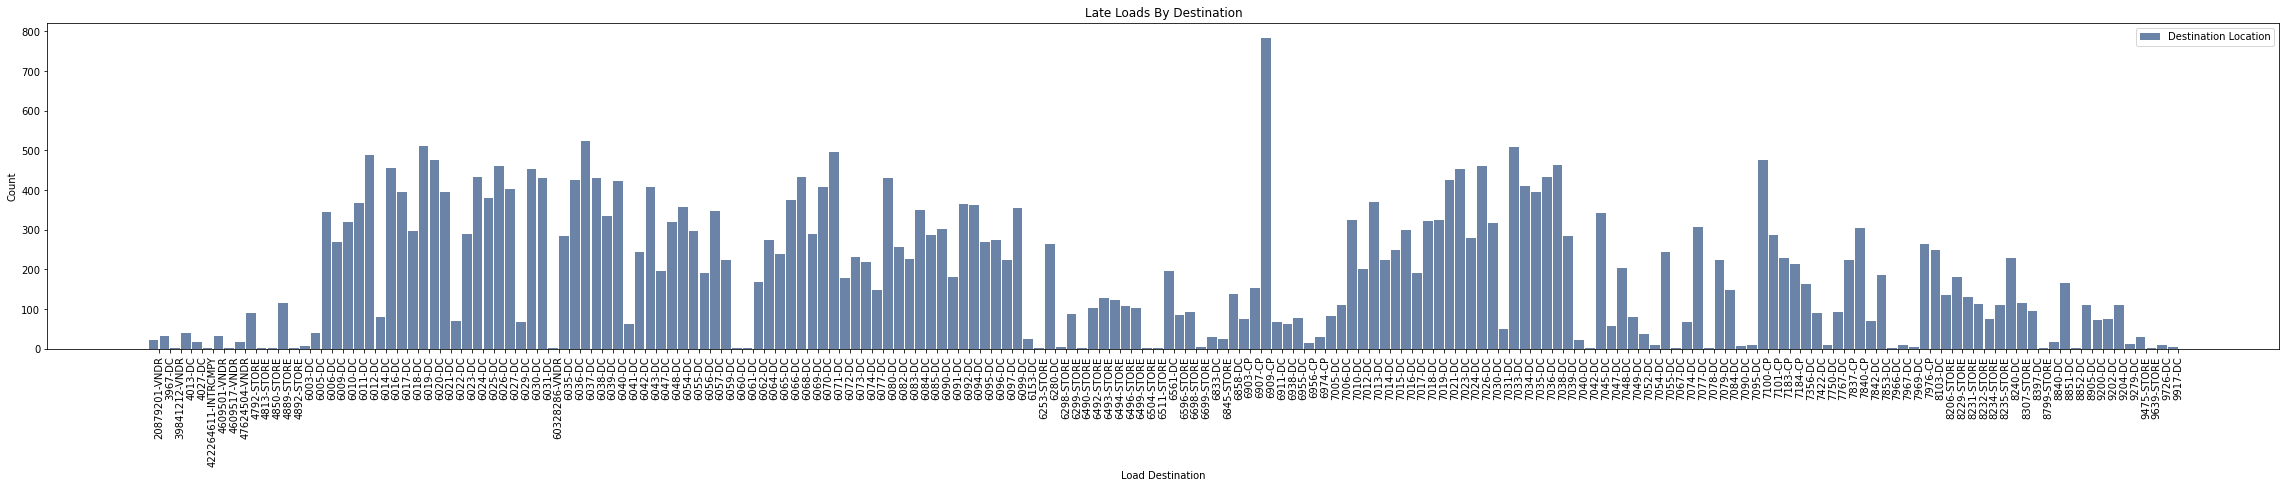

In [52]:
hist = thinkstats2.Hist(late_load['dest_loc_cd'], label='Destination Location')
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Hist(hist)
thinkplot.Config(title='Late Loads By Destination', xlabel='Load Destination', ylabel='Count')
#below code saves the plot to a file
thinkplot.save(root='dest_hist', bbox_inches = 'tight')

Similar to the histogram for where late loads originate from, we can clearly see the mode in late load destinations.  Considering that one distribution center services multiple stores and clubs, it might be plausible to suggest that the distribution center represented by the mode in the previous histrogram may be contributing to multple late loads in this histogram.

Writing equip_hist.pdf
Writing equip_hist.png


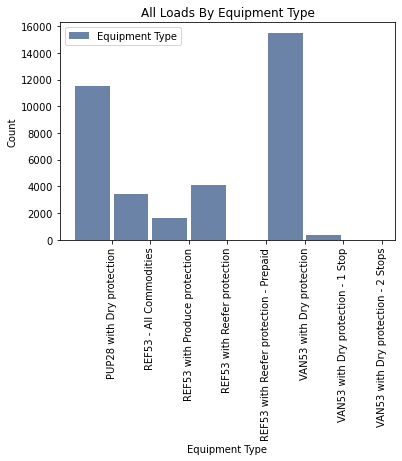

In [51]:
hist = thinkstats2.Hist(late_load['equip_type_desc'], label='Equipment Type')
thinkplot.Hist(hist)
plt.xticks(rotation=90)
thinkplot.Config(title='All Loads By Equipment Type', xlabel='Equipment Type', ylabel='Count')
thinkplot.save(root='equip_hist', bbox_inches = 'tight')

Here we can see that the mode represents equipment type 'VAN53 with Dry Protection'.  Even though the word 'van' is included in the description, this equipment type is your typical 53 foot dry trailer.  This makes sense as a majority of the loads Walmart moves are with this type of equipment.  We can see this in the histogram below.

Writing carrier_pick.pdf
Writing carrier_pick.png


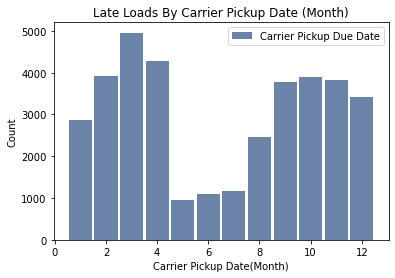

In [116]:
hist = thinkstats2.Hist(late_load['carr_pckup_due_dt'].dt.month, label='Carrier Pickup Due Date')
thinkplot.Hist(hist)
#plt.xticks(late_load['sc_load.carr_dlvr_due_dt'].dt.month)
thinkplot.Config(title='Late Loads By Carrier Pickup Date (Month)', xlabel='Carrier Pickup Date(Month)', ylabel='Count')
thinkplot.save(root='carrier_pick', bbox_inches = 'tight')

Writing carrier_pick_all.pdf
Writing carrier_pick_all.png


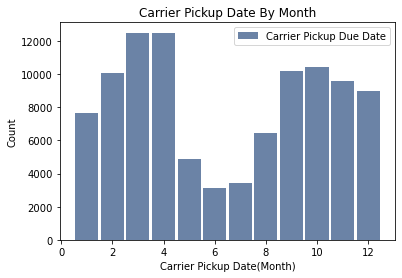

In [117]:
hist = thinkstats2.Hist(load_df['carr_pckup_due_dt'].dt.month, label='Carrier Pickup Due Date')
thinkplot.Hist(hist)
#plt.xticks(late_load['sc_load.carr_dlvr_due_dt'].dt.month)
thinkplot.Config(title='Carrier Pickup Date By Month', xlabel='Carrier Pickup Date(Month)', ylabel='Count')
thinkplot.save(root='carrier_pick_all', bbox_inches = 'tight')

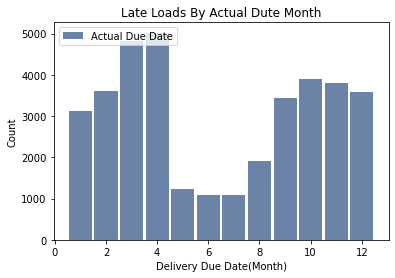

In [52]:
hist = thinkstats2.Hist(late_load['act_load_cmpl_ts'].dt.month, label='Actual Due Date')
thinkplot.Hist(hist)
#plt.xticks(late_load['sc_load.carr_dlvr_due_dt'].dt.month)
thinkplot.Config(title='Late Loads By Actual Dute Month', xlabel='Delivery Due Date(Month)', ylabel='Count')

From the histogram above, we can see that the mode for carrier delivery due date is March.  There isn't a tail and the histogram shows the possibility of some seasonality to the data.  This makes sense when we look at the histogram below of all loads during the same time frame.  Total load volumne increases during the same time periods.  <<maybe put both of these together>>

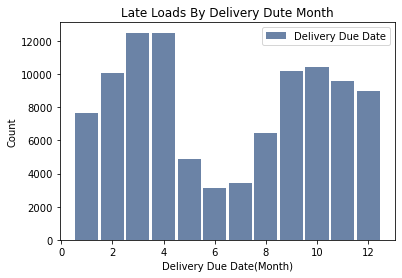

In [27]:
hist = thinkstats2.Hist(load_df['carr_dlvr_due_dt'].dt.month, label='Delivery Due Date')
thinkplot.Hist(hist)
#plt.xticks(late_load['sc_load.carr_dlvr_due_dt'].dt.month)
thinkplot.Config(title='Late Loads By Delivery Dute Month', xlabel='Delivery Due Date(Month)', ylabel='Count')

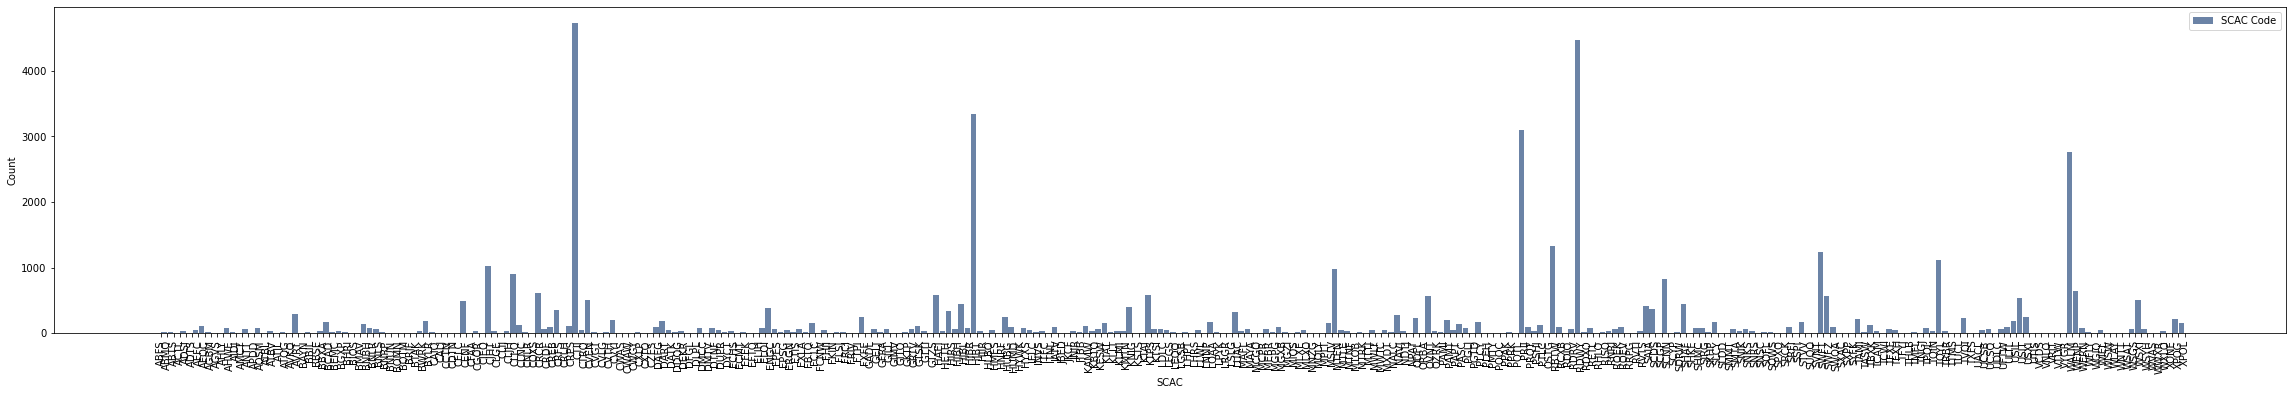

In [29]:
#thinkplot.PrePlot(rows=150)
hist = thinkstats2.Hist(late_load['scac_cd'], label='SCAC Code')
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='SCAC', ylabel='Count')
#thinkplot.save(root='test')

Writing carrier_name_hist.pdf
Writing carrier_name_hist.png


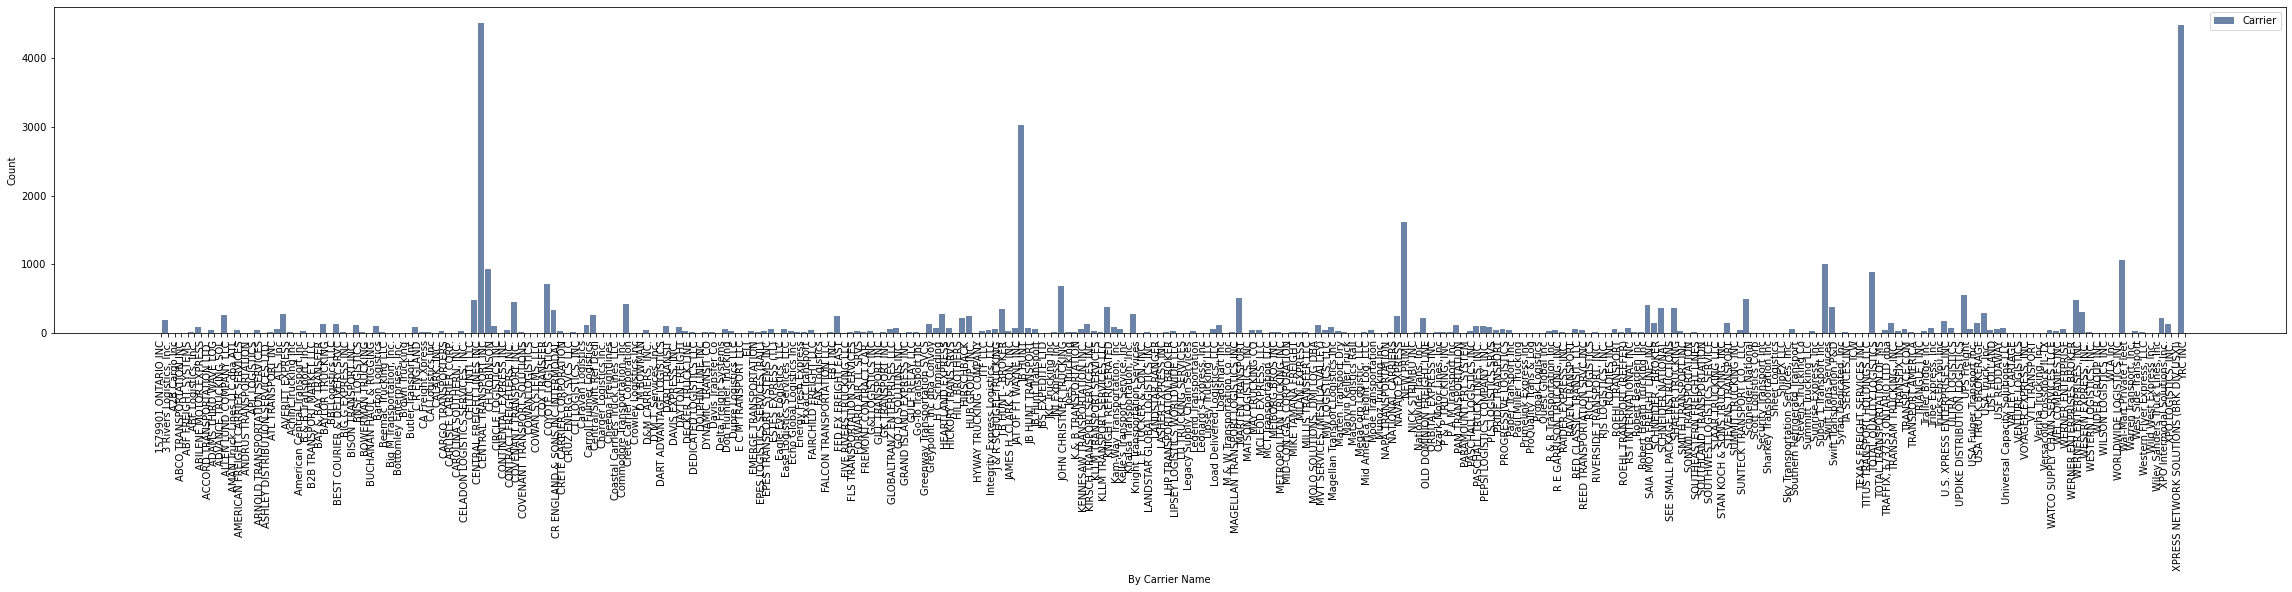

In [109]:
#by carrier name, this should be the same as SCAC 
hist = thinkstats2.Hist(late_load['carrier_nm'], label='Carrier')
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='By Carrier Name', ylabel='Count')
thinkplot.save(root='carrier_name_hist', bbox_inches = 'tight')

Writing tot_shipment.pdf
Writing tot_shipment.png


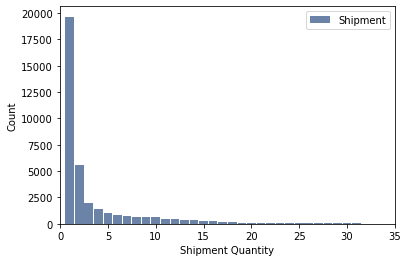

In [114]:
hist = thinkstats2.Hist(late_load['tot_shpmnt_qty'], label='Shipment')
thinkplot.Hist(hist)
thinkplot.Config(xlim=[0, 35], xlabel='Shipment Quantity', ylabel='Count')
thinkplot.save(root='tot_shipment', bbox_inches = 'tight')

From the histogram, we can see the distribution is right-skewed or has a positive-skew.  This skewness makes sense here as Walmart does attempt to create purchase-orders that generally equal to one truck-load of freight.  Optimizing the consolidation of multiple purchase-orders into a single truck-load is very complicated and the additional manual work and facilities increase the cost of the freight movement.

Writing tot_miles.pdf
Writing tot_miles.png


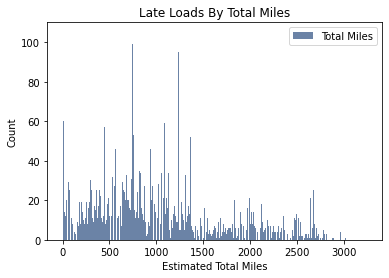

In [118]:
hist = thinkstats2.Hist(late_load['est_tot_mi_qty'], label='Total Miles')
thinkplot.Hist(hist)
thinkplot.Config(title='Late Loads By Total Miles', xlabel='Estimated Total Miles', ylabel='Count', ylim=[0, 110])
thinkplot.save(root='tot_miles', bbox_inches = 'tight')

Here we can see the mode for total miles is <INSERT>.  From the histogram, we can see the distribution is right-skewed or a positive-skew.  This skewness makes sense as the Walmart transportation network is designed for lower length hauls and we want to have our drivers back home every week.  This and other operational decisions keep the total length of haul lower with some excpetions.

Writing line_charges.pdf
Writing line_charges.png


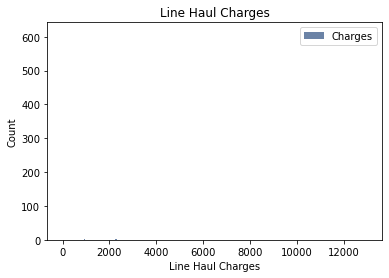

In [113]:
hist = thinkstats2.Hist(late_load['lnhul_chrg_amt'], label='Charges')
thinkplot.Hist(hist)
thinkplot.Config(title='Line Haul Charges', xlabel='Line Haul Charges', ylabel='Count')
#thinkplot.save(root='line_charges', bbox_inches = 'tight')

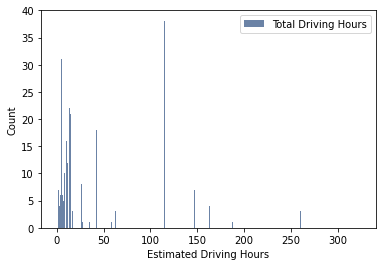

In [41]:
#driving hours
hist = thinkstats2.Hist(late_load['est_tot_drvg_hr_qty'], label='Total Driving Hours')
thinkplot.Hist(hist)
thinkplot.Config(ylim=[0, 40], xlabel='Estimated Driving Hours', ylabel='Count')

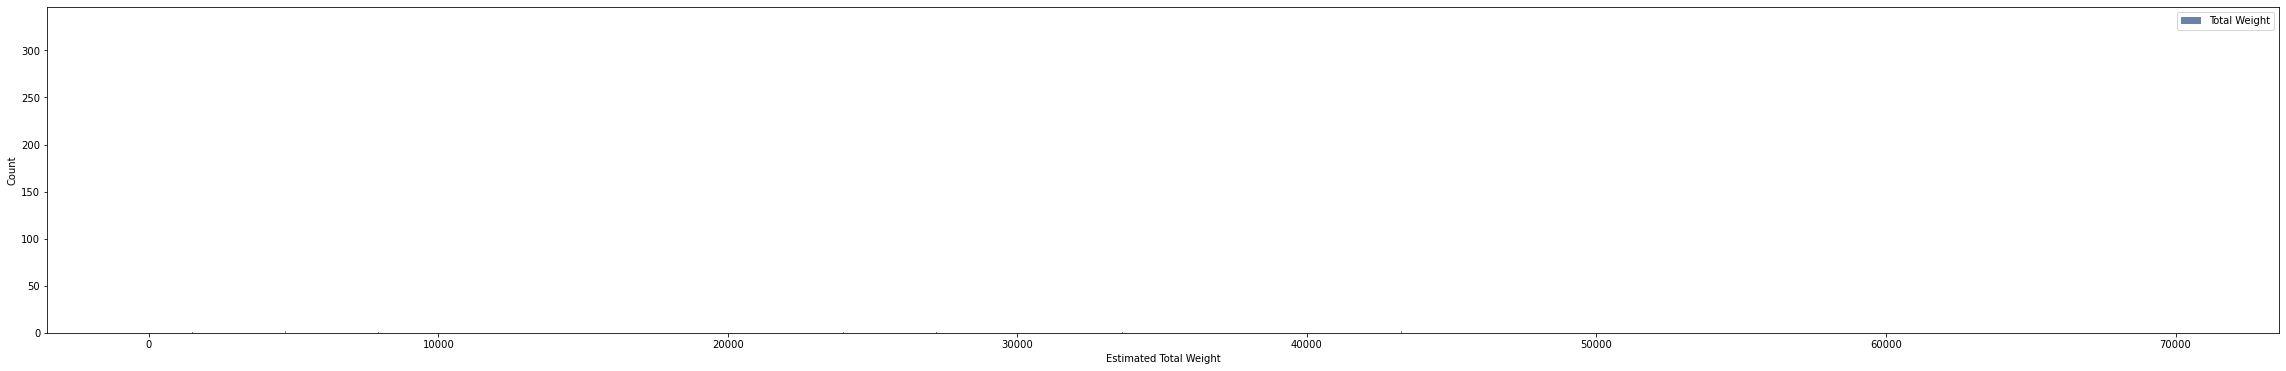

In [43]:
#total weight
hist = thinkstats2.Hist(late_load['est_tot_wt_qty'], label='Total Weight')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Estimated Total Weight', ylabel='Count')

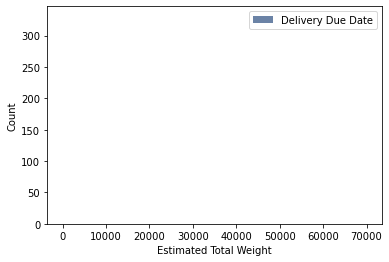

In [53]:
#total cube
hist = thinkstats2.Hist(late_load['est_max_cube_qty'], label='Max Cube')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Estimated Max Cube', ylabel='Count')

Using pg. 29 (35) of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

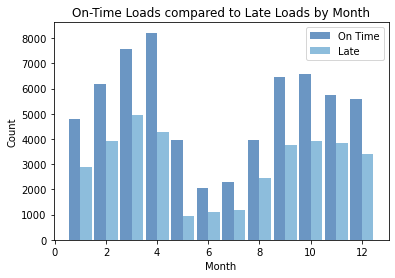

Writing loads_PMF.pdf
Writing loads_PMF.png


<Figure size 576x432 with 0 Axes>

In [121]:
on_time_load = load_df[load_df.Late_Load == 0]
late_load = load_df[load_df.Late_Load == 1]

on_time_hist = thinkstats2.Hist(on_time_load['carr_dlvr_due_dt'].dt.month, label='On Time')
late_hist = thinkstats2.Hist(late_load['carr_dlvr_due_dt'].dt.month, label='Late')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(on_time_hist, align='right', width=width)
thinkplot.Hist(late_hist, align='left', width=width)
thinkplot.Show(title='On-Time Loads compared to Late Loads by Month', xlabel='Month', ylabel='Count')

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

Writing carrier_due_date.pdf
Writing carrier_due_date.png


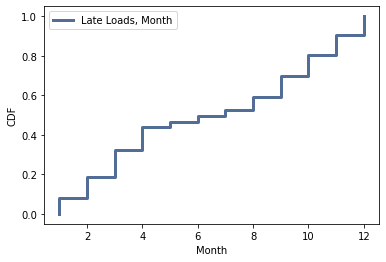

In [122]:
cdf = thinkstats2.Cdf(late_load['carr_dlvr_due_dt'].dt.month, label='Late Loads, Month')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Month', ylabel='CDF', loc='upper left')
thinkplot.save(root='carrier_due_date', bbox_inches = 'tight')

The cumulative distribution function for the variable carr_dlvr_due_dt (carrier delivery due date) reflects the two peaks from the pervious distribution histogram. The distribution shows fairly regular increase from January through April, then a flatenning during the summer months and another increase from September through December. These increases coniside with the seasonality of the retail business.

Writing tot_miles_cdf.pdf
Writing tot_miles_cdf.png


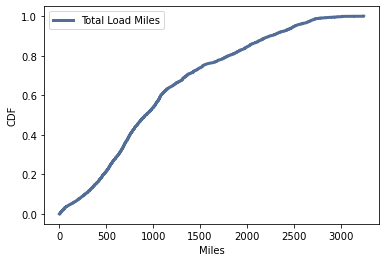

In [123]:
cdf = thinkstats2.Cdf(late_load['est_tot_mi_qty'], label='Total Load Miles')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Miles', ylabel='CDF', loc='upper left')
thinkplot.save(root='tot_miles_cdf', bbox_inches = 'tight')

The cumulative distribution function for the variable sc_load.est_tot_mi_qty (estimated total miles) reflects the peak to the left of the histogram which relates back to more loads being shorter hauls.

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

Mean, Var 1086.1306079255896 490860.6773078846
Sigma 700.6144997842141
Writing tot_miles_norm.pdf
Writing tot_miles_norm.png


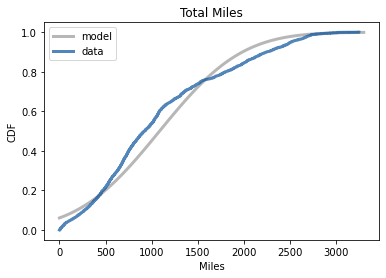

In [124]:
total_miles = late_load['est_tot_mi_qty'].dropna()
mu, var = thinkstats2.TrimmedMeanVar(total_miles, p=0.01)
print('Mean, Var', mu, var)

sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=3300)

thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf = thinkstats2.Cdf(total_miles, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Total Miles',
                 xlabel='Miles',
                 ylabel='CDF')

thinkplot.save(root='tot_miles_norm', bbox_inches = 'tight')

C:\Users\mpari\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


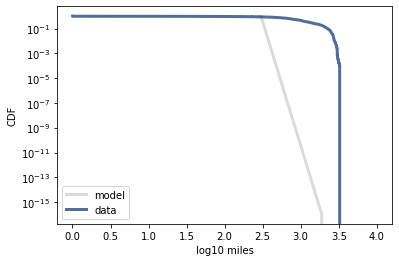

In [28]:
total_miles = late_load['est_tot_mi_qty'].dropna()
log_total_miles = np.log10(total_miles)

cdf = thinkstats2.Cdf(total_miles, label='data')
cdf_log = thinkstats2.Cdf(log_total_miles, label='data')

xs, ys = thinkstats2.RenderParetoCdf(xmin=300, alpha=20, low=0, high=10000)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 miles',
                 ylabel='CDF',
                 yscale='log', loc='lower left')

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [127]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [30]:
sample_df = SampleRows(load_df, 5000)

In [208]:
load_dest = sample_df['dest_loc_cd']
late_load = sample_df['Late_Load']
total_miles = sample_df['est_tot_mi_qty']
Equipment = sample_df['equip_type_desc']
carrier = sample_df['carrier_nm']
haul_charge = sample_df['lnhul_chrg_amt']

Writing load_dest_scat.pdf
Writing load_dest_scat.png


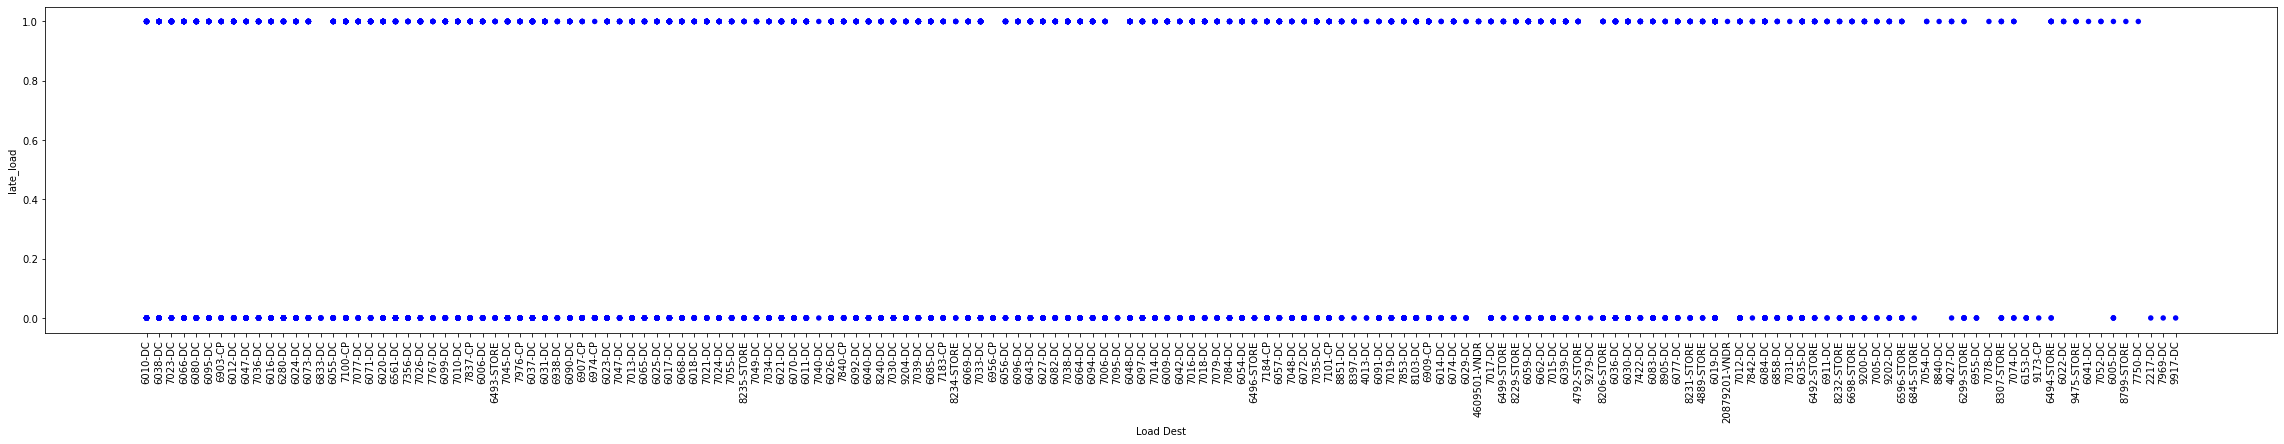

In [210]:
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Scatter(load_dest, late_load, alpha=1)
thinkplot.Config(xlabel='Load Dest',
                 ylabel='late_load',
                 legend=False)
thinkplot.save(root='load_dest_scat', bbox_inches = 'tight')

Writing total_miles_scat.pdf
Writing total_miles_scat.png


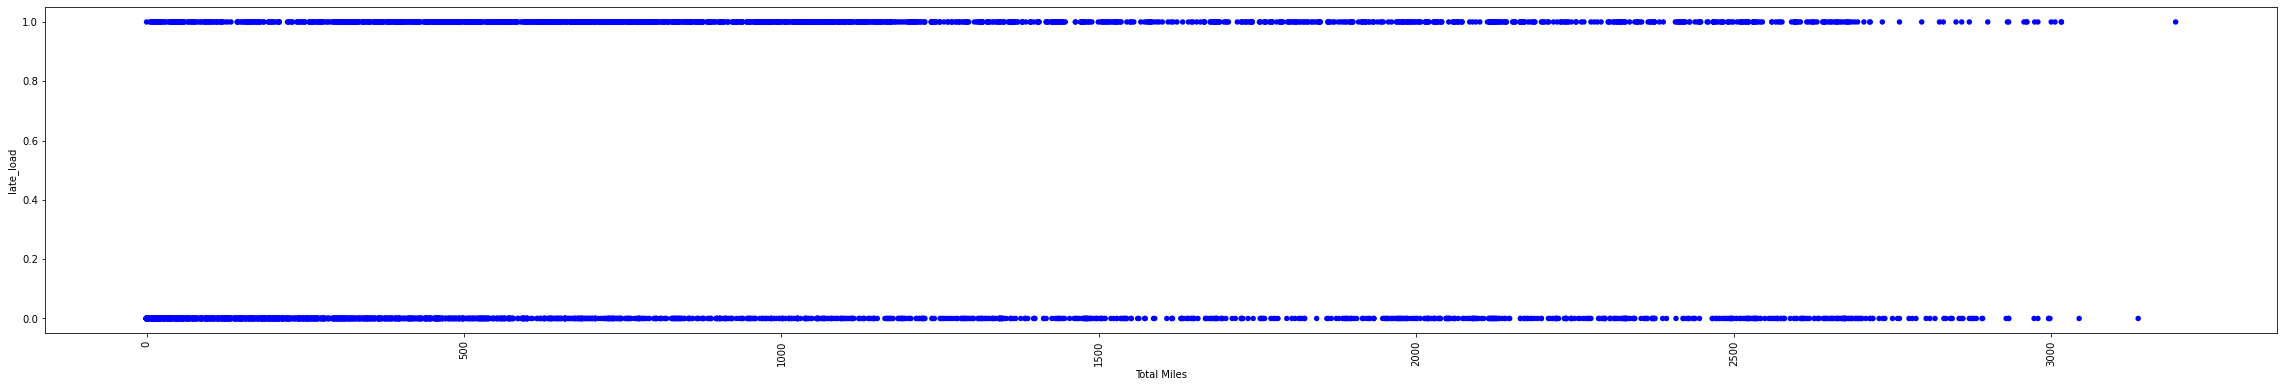

In [212]:
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Scatter(total_miles, late_load, alpha=1)
thinkplot.Config(xlabel='Total Miles',
                 ylabel='late_load',
                 legend=False)
thinkplot.save(root='total_miles_scat', bbox_inches = 'tight')

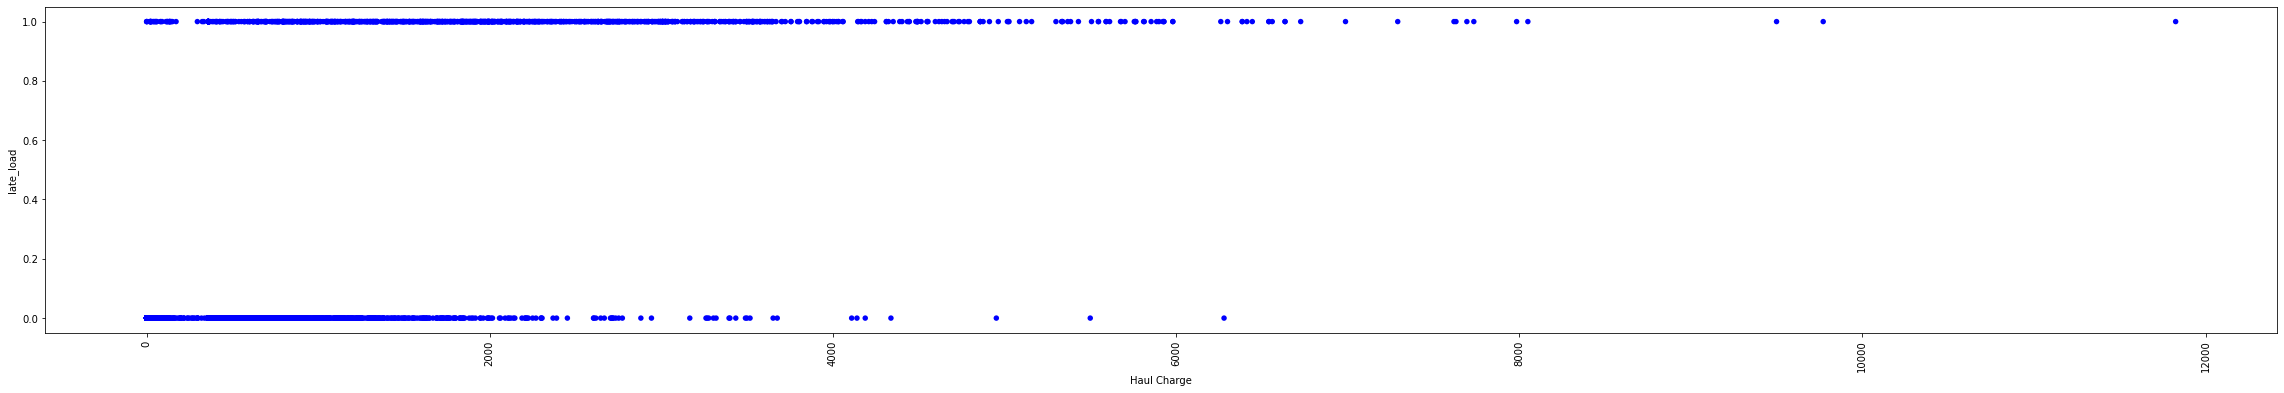

In [49]:
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Scatter(haul_charge, late_load, alpha=1)
thinkplot.Config(xlabel='Haul Charge',
                 ylabel='late_load',
                 legend=False)

Writing total_miles_scat.pdf
Writing total_miles_scat.png


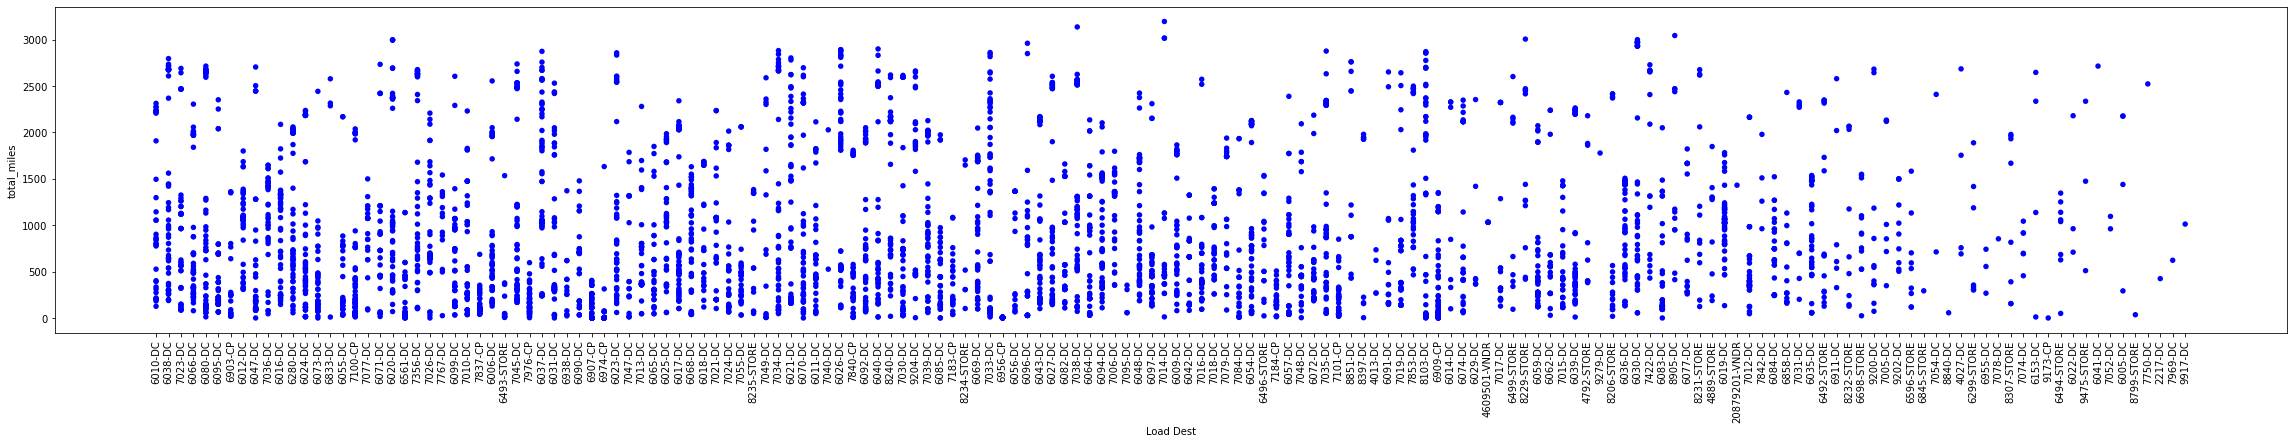

In [209]:
thinkplot.figure(figsize=(40,6))
plt.xticks(rotation=90)
thinkplot.Scatter(load_dest, total_miles, alpha=1)
thinkplot.Config(xlabel='Load Dest',
                 ylabel='total_miles',
                 legend=False)
thinkplot.save(root='total_miles_scat', bbox_inches = 'tight')

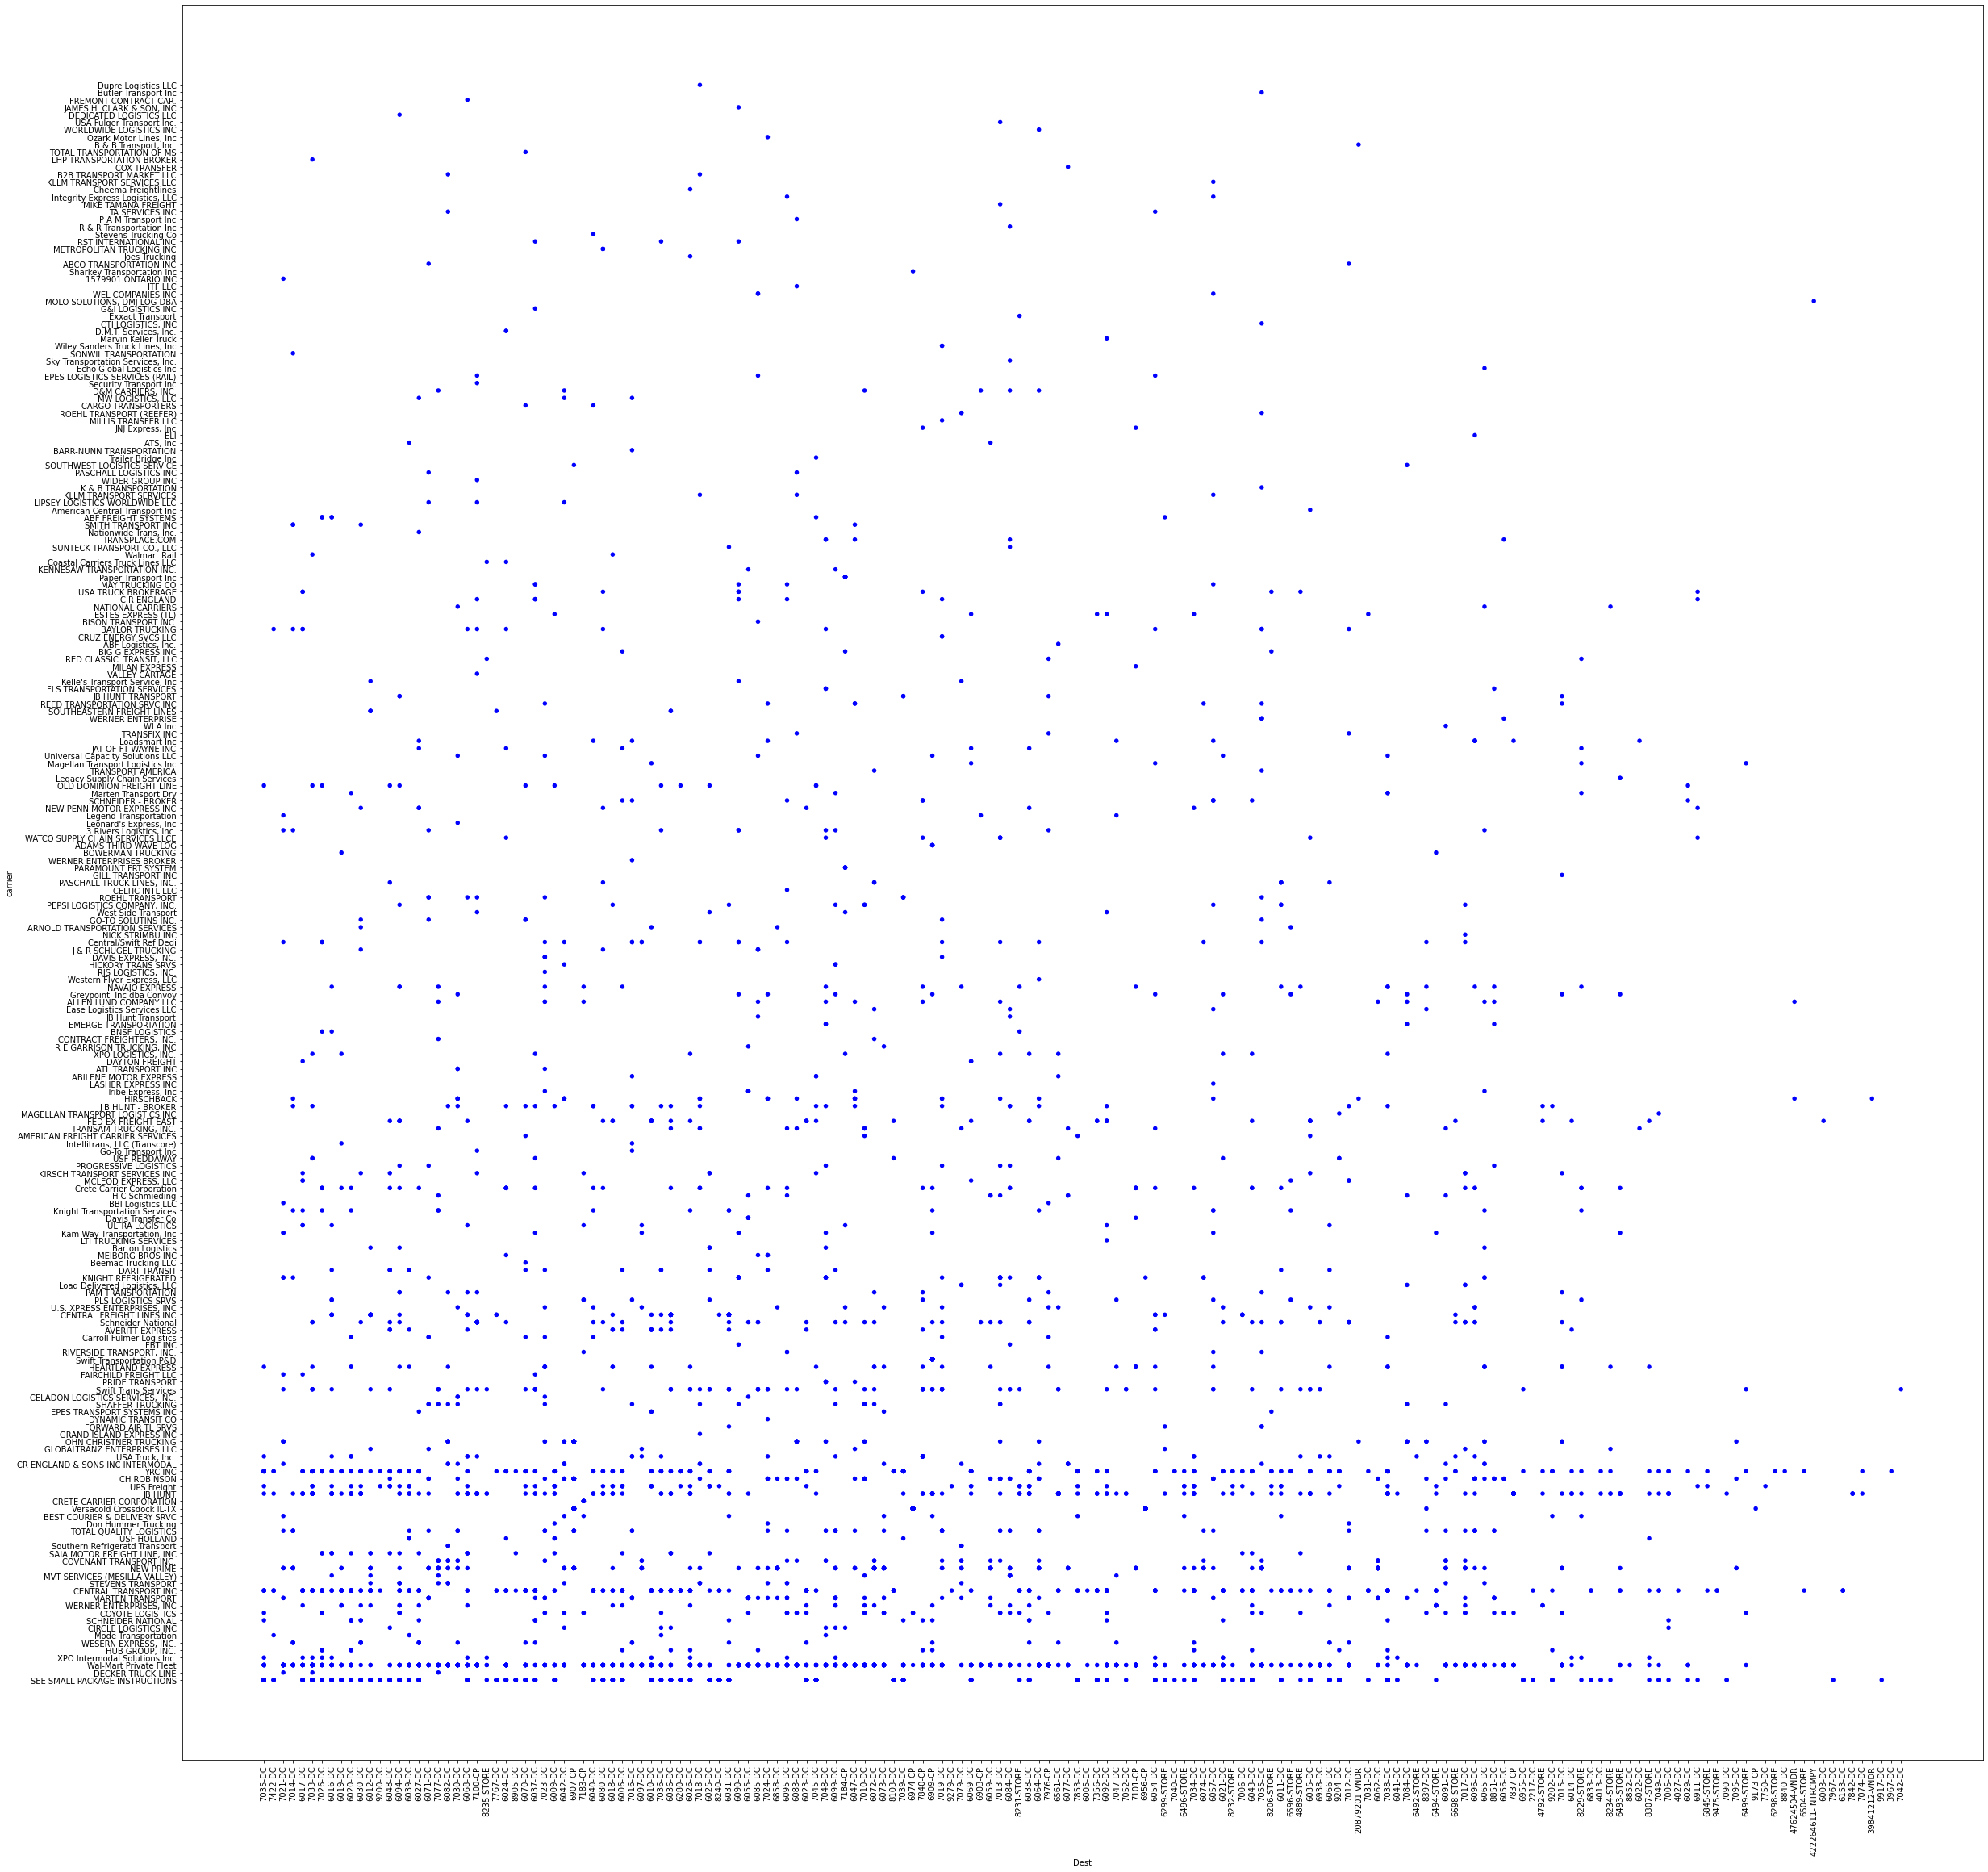

In [46]:
thinkplot.figure(figsize=(40,40))
plt.xticks(rotation=90)
thinkplot.Scatter(load_dest, carrier, alpha=1)
thinkplot.Config(xlabel='Dest',
                 ylabel='carrier',
                 legend=False)

In [61]:
#Cov(load_dest, late_load)
Cov(total_miles, late_load)
#Cov(Equipment, late_load)
#Cov(carrier, late_load)
Cov(haul_charge, late_load)

nan

I created several scatter plots to show how some of the data may be related.  The goal of this analysis is to determine if we can find significant correlations between our dependent variables (mix of categorical and continuous data), logistic regression is what we will use to determine if we have any significant correlations.

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

Logistic Regression

In [65]:
load_df.columns

Index(['load_id', 'orign_loc_cd', 'orign_loc_id', 'orign_loc_type_cd',
       'orign_loc_type_desc', 'orign_zone_cd', 'orign_zone_desc',
       'orign_loc_nm', 'orign_st_addr_line_1', 'orign_city_nm',
       ...
       'load_last_event_sys_gen_ind', 'manl_load_late_event_cd',
       'manl_load_late_event_desc', 'src_rcv_ts', 'load_userid', 'load_ts',
       'upd_ts', 'upd_userid', 'Late_Load', 'delivery_days_dif'],
      dtype='object', length=164)

In [ ]:
Logistic regression is used here as the dependent variable is catagorical.

In [155]:
sample_df = SampleRows(load_df, 5000)

In [162]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [168]:
Corr(load_df['orign_loc_id'], load_df['Late_Load'])

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [169]:
Corr(load_df['dest_loc_id'], load_df['Late_Load'])

0.012992537979249142

In [170]:
Corr(load_df['carrier_nm'], load_df['Late_Load'])

TypeError: can only concatenate str (not "float") to str

In [171]:
Corr(load_df['equip_type_desc'], load_df['Late_Load'])

TypeError: can only concatenate str (not "float") to str

In [172]:
Corr(load_df['est_tot_mi_qty'], load_df['Late_Load'])

0.2774751144393062

In [173]:
Corr(load_df['tot_shpmnt_qty'], load_df['Late_Load'])

0.02955030579012858

In [167]:
#Corr(sample_df['dest_loc_id'], sample_df['Late_Load'])
Corr(load_df['carr_pckup_due_dt'], load_df['Late_Load'])

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Chi Squared Tests - Independence

In [196]:
late_load_chi = load_df['Late_Load']
orign_loc_id_chi = load_df['orign_loc_id']
dest_loc_id_chi = load_df['dest_loc_id']
carrier_nm_chi = load_df['carrier_nm']
equip_type_chi = load_df['equip_type_desc']
carr_pckup_due_chi = load_df['carr_pckup_due_dt']

In [205]:
cross_table = pd.crosstab(carr_pckup_due_chi, late_load_chi)
cross_table

Late_Load,0,1
carr_pckup_due_dt,,
2019-04-28,3,0
2019-04-29,0,2
2019-04-30,2,1
2019-05-01,2,1
2019-05-02,1,2
...,...,...
2021-07-02,1,0
2021-07-03,1,0
2021-07-24,1,0


In [ ]:
cross_table = pd.crosstab(orign_loc_id_chi, late_load_chi)
cross_table

In [199]:
cross_table = pd.crosstab(dest_loc_id_chi, late_load_chi)
cross_table

Late_Load,0,1
dest_loc_id,,
2217,4,0
3967,27,32
4013,48,39
4027,24,17
4792,62,89
...,...,...
39841212,11,1
47624504,5,17
60208611,1,0


In [206]:
chi_val, pVal, degrees_freedom, exp_vals = chi2_contingency(cross_table)
chi_val, pVal, degrees_freedom, exp_vals

(3386.814729447044,
 0.0,
 774,
 array([[1.90075901, 1.09924099],
        [1.26717267, 0.73282733],
        [1.90075901, 1.09924099],
        ...,
        [0.63358634, 0.36641366],
        [0.63358634, 0.36641366],
        [0.63358634, 0.36641366]]))

<AxesSubplot:xlabel='Late_Load', ylabel='equip_type_desc'>

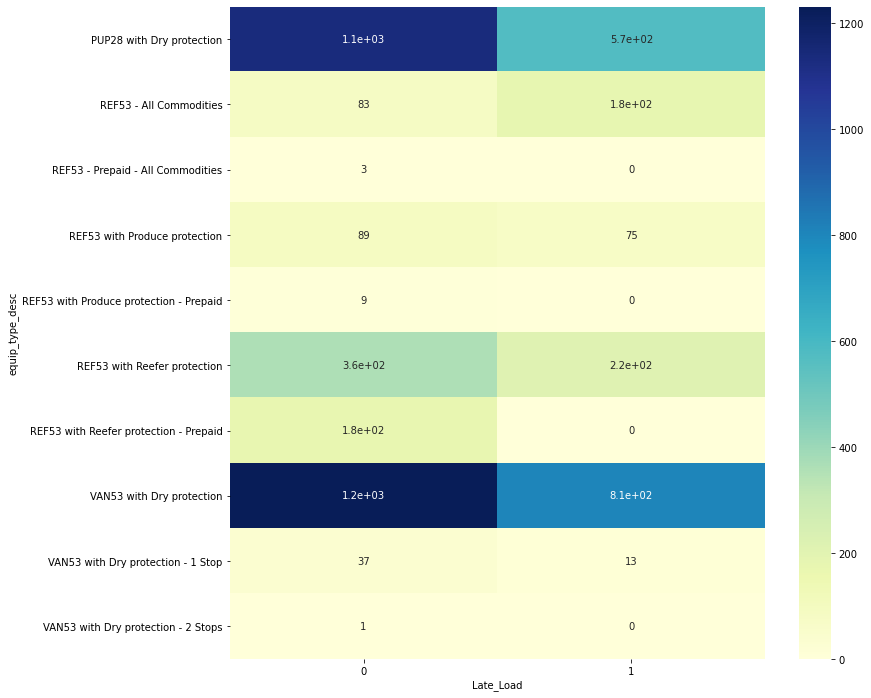

In [180]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [186]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
print(p)
print(c)
print(dof)
print(expected)

0.0
28098.237819819904
5593
[[ 51.3204932   29.6795068 ]
 [148.89278893  86.10721107]
 [  8.23662237   4.76337763]
 ...
 [ 24.7098671   14.2901329 ]
 [  1.26717267   0.73282733]
 [  1.26717267   0.73282733]]


In [166]:
load_df.corr()

,load_id,dest_loc_id,dest_postal_cd,non_live_pckup_ind,non_live_dlvr_ind,spot_rate_ind,max_shpmnt_qty,load_stop_qty,optimizer_batch_id,op_load_status_id,carr_type_id,lnhul_chrg_amt,fuel_surch_amt,tot_shpmnt_qty,tot_order_case_qty,tot_ord_pallet_qty,on_hld_shpmnt_qty,est_met_ovrd_ind,est_tot_lad_len_qty,est_max_lad_len_qty,est_load_cmpl_hr_qty,est_tot_mi_qty,est_tot_dir_mi_qty,est_out_of_rte_mi_qty,est_load_mi_qty,est_unloaded_mi_qty,est_interload_mi_qty,est_repositioning_mi_qty,est_rtn_to_orign_mi_qty,est_tot_drvg_hr_qty,est_on_duty_hr_qty,est_off_duty_hr_qty,est_loadg_hr_qty,est_unloading_hr_qty,est_max_wait_hr_qty,est_wait_hr_qty,est_tot_wt_qty,est_max_wt_qty,est_tot_cube_qty,est_max_cube_qty,tot_optm_case_qty,est_max_case_qty,tot_optm_pallet_qty,est_max_pallet_qty,est_gross_carrier_chrg_amt,est_net_carrier_chrg_amt,load_cre_mthd_id,load_supended_status_id,pland_prmry_stop_qty,carrier_trnsp_mode_id,rate_shop_rsn_id,vouch_cre_excpt_ind,team_drvr_ind,commodity_id,fin_load_status_id,shpmnt_plang_status_id,tndr_req_id,tendering_status_id,valid_rate_ind,frght_pymt_type_id,load_last_event_sys_gen_ind,Late_Load,delivery_days_dif
load_id,1.000000,-0.000910,-0.031996,-0.284294,0.003292,0.000018,0.077704,0.039331,0.050163,-0.072567,0.033434,-0.020565,0.094748,0.077704,-0.135335,-0.076518,0.003104,0.241490,0.005962,0.005962,0.127488,0.046960,0.046919,0.010587,0.047105,NaN,NaN,NaN,NaN,0.107636,0.109445,0.064763,-0.049149,-0.021472,0.015053,0.014822,-0.243366,-0.243366,-0.012571,-0.243366,-0.076657,-0.135335,-0.064784,-0.076518,-0.079054,-0.081831,0.073639,-0.038103,0.121979,0.235725,-0.003908,-0.112911,-0.100465,0.236580,0.085063,-0.052536,0.993148,-0.080026,0.015575,-0.122852,-0.075289,0.001157,0.023402
dest_loc_id,-0.000910,1.000000,0.003698,-0.006342,-0.002187,0.057678,-0.006805,-0.002657,0.052378,0.004863,-0.004067,0.026244,0.010380,-0.006805,-0.014295,0.000202,-0.000084,-0.003394,-0.010639,-0.010639,-0.003821,0.003731,0.003735,-0.000562,0.003726,NaN,NaN,NaN,NaN,-0.005844,-0.006000,0.004821,-0.021429,-0.001567,0.008717,0.008705,0.015243,0.015243,0.012677,0.015243,-0.007423,-0.014295,0.009943,0.000202,0.023616,0.025852,0.032588,-0.000869,0.001777,-0.008179,-0.000208,-0.004226,0.014126,-0.014932,0.010460,0.004455,-0.001194,0.005799,0.003183,-0.003335,-0.006574,0.012993,-0.001253
dest_postal_cd,-0.031996,0.003698,1.000000,-0.020059,-0.057929,0.008674,0.041527,0.062037,0.011307,-0.078835,-0.134344,-0.129051,0.000959,0.041527,0.036552,0.019922,-0.001710,-0.012372,0.047622,0.047622,-0.083300,-0.126034,-0.125931,0.000261,-0.125931,NaN,NaN,NaN,NaN,-0.064607,-0.066834,-0.061885,-0.017789,-0.108261,0.035308,0.035537,0.017910,0.017910,0.054669,0.017910,-0.003166,0.036552,0.038932,0.019922,-0.059345,-0.057602,0.001740,0.000072,-0.015442,-0.015063,0.005994,-0.000499,-0.049427,-0.088224,0.012334,-0.080073,-0.032579,0.063393,-0.053680,0.144990,0.053392,-0.031999,-0.008737
non_live_pckup_ind,-0.284294,-0.006342,-0.020059,1.000000,0.004200,-0.021979,-0.038612,-0.030798,-0.081314,0.080954,0.205608,-0.109004,-0.155358,-0.038612,0.130200,0.100538,-0.001735,-0.064775,-0.081702,-0.081702,-0.180643,-0.157814,-0.157814,-0.005657,-0.157919,NaN,NaN,NaN,NaN,-0.190556,-0.184774,-0.010574,0.270534,0.234971,-0.004557,-0.004456,0.256944,0.256944,0.067068,0.256944,0.167303,0.130200,0.003592,0.100538,-0.022187,-0.013524,-0.082888,-0.003947,0.030822,-0.194824,-0.002020,-0.076773,-0.031695,0.060180,-0.166676,0.075774,-0.279535,0.031721,0.005393,-0.071104,0.070010,-0.075751,-0.026213
non_live_dlvr_ind,0.003292,-0.002187,-0.057929,0.004200,1.000000,-0.001124,-0.040564,-0.010781,-0.020880,0.036921,-0.004142,0.027667,0.022623,-0.040564,-0.054149,-0.031323,-0.000624,-0.013656,-0.012126,-0.012126,0.021219,0.058646,0.058546,0.003303,0.058606,NaN,NaN,NaN,NaN,-0.026558,-0.024735,0.126170,0.056438,0.091433,-0.011280,-0.011296,-0.053055,-0.053055,-0.061105,-0.053055,-0.026962,-0.054149,-0.037833,-0.031323,-0.021629,-0.016913,-0.021942,-0.005393,0.010042,0.059197,-0.001560,-0.02

In [213]:
formula = 'Late_Load ~ orign_loc_id + dest_loc_id + carrier_nm + equip_type_desc'
model = smf.logit(formula, data=sample_df)
results = model.fit()
results.summary

C:\Users\mpari\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\mpari\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [219]:
formula = 'Late_Load ~ dest_loc_cd'
model = smf.logit(formula, data=sample_df)
results = model.fit()
results.summary

         Current function value: 0.608461
         Iterations: 35


C:\Users\mpari\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x00000183483C0BE0>>

In [218]:
formula = 'Late_Load ~ est_tot_mi_qty'
model = smf.logit(formula, data=load_df)
results = model.fit()
results.summary

Optimization terminated successfully.
         Current function value: 0.618998
         Iterations 5


<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x000001833C3DA970>>

In [148]:
formula = 'Late_Load ~ carrier_nm'
model = smf.logit(formula, data=sample_df)
results = model.fit()
results.summary

         Current function value: 0.364772
         Iterations: 35


LinAlgError: Singular matrix

In [149]:
formula = 'Late_Load ~ equip_type_desc'
model = smf.logit(formula, data=sample_df)
results = model.fit(maxiter=70)
results.summary

         Current function value: inf
         Iterations: 70


C:\Users\mpari\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\mpari\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [63]:
formula = 'Late_Load ~ lnhul_chrg_amt'
model = smf.logit(formula, data=sample_df)
results = model.fit()
results.summary

PatsyError: Index mismatch between data.index and late_load
    late_load ~ lnhul_chrg_amt
    ^^^^^^^^^